<a href="https://colab.research.google.com/github/hongqin/AI4Health/blob/main/conformal_prediction_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5678 - loss: 0.7385 - val_accuracy: 0.7688 - val_loss: 0.5431
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.8299 - loss: 0.4610 - val_accuracy: 0.8000 - val_loss: 0.4377
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.8794 - loss: 0.3526 - val_accuracy: 0.8562 - val_loss: 0.3569
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.8975 - loss: 0.2935 - val_accuracy: 0.8750 - val_loss: 0.3051
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.9202 - loss: 0.2264 - val_accuracy: 0.8938 - val_loss: 0.2609
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.9353 - loss: 0.2086 - val_accuracy: 0.9125 - val_loss: 0.2246
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.9502 - loss: 0.1749 - val_accuracy: 0.9375 - val_loss: 0.2001
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.9500 - loss: 0.1677 - val_accuracy: 0.9250 - val_lo

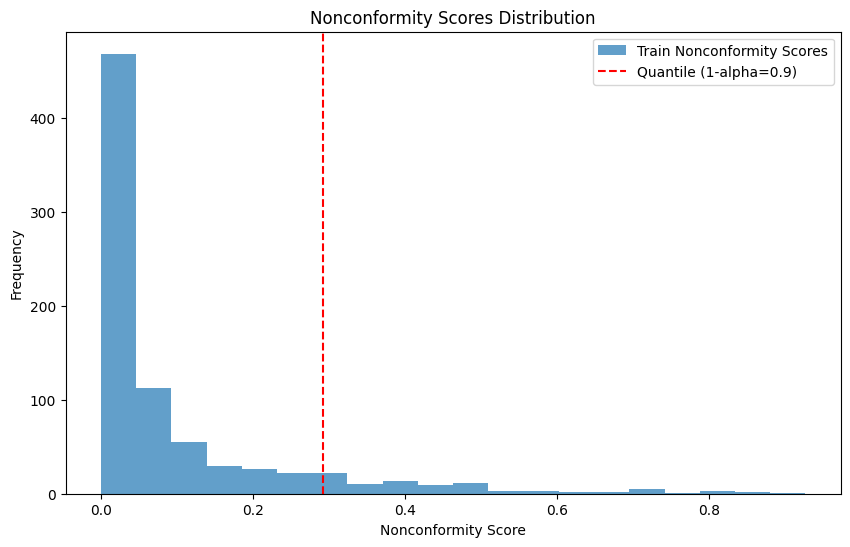

In [1]:
# Step 1: Generate a Synthetic Dataset
# We create a dataset with 1000 samples and 20 features.
# 10 features are informative, meaning they contribute to class separation.
# The dataset is balanced between two classes (binary classification problem).
# Conformal Prediction with Neural Networks in Python

# Install required libraries
!pip install tensorflow scikit-learn

# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Generate a Synthetic Dataset
from sklearn.datasets import make_classification

# Generate a binary classification dataset
X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42
)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build and Train a Neural Network
# Define a simple feedforward neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Step 3: Compute Nonconformity Scores
# Predict probabilities for the training data
probabilities = model.predict(X_train).flatten()

# Calculate nonconformity scores (e.g., |1 - probability| for the true class)
nonconformity_scores = np.abs(y_train - probabilities)

# Step 4: Define a Prediction Region
# Predict probabilities for the test data
test_probabilities = model.predict(X_test).flatten()

# Calculate nonconformity scores for the test data
test_nonconformity_scores = np.abs(y_test - test_probabilities)

# Define a quantile for the confidence level (e.g., 90%)
alpha = 0.1
quantile = np.quantile(nonconformity_scores, 1 - alpha)

# Create prediction regions for the test set
prediction_region = test_probabilities > quantile

# Step 5: Evaluate Prediction Regions
# Compare prediction region to actual test labels
accuracy = accuracy_score(y_test, prediction_region)

print(f"Accuracy of conformal prediction: {accuracy * 100:.2f}%")

# Step 6: Visualize Results (Optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(nonconformity_scores, bins=20, alpha=0.7, label="Train Nonconformity Scores")
plt.axvline(x=quantile, color='r', linestyle='--', label=f"Quantile (1-alpha={1-alpha})")
plt.title("Nonconformity Scores Distribution")
plt.xlabel("Nonconformity Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()



In [2]:

# Step 7: Test Examples
# Let's test the model with a few new data points

# Generate random test samples
sample_test_data = np.random.randn(5, X.shape[1])  # 5 random samples with same feature size

# Predict probabilities for these new test samples
sample_probabilities = model.predict(sample_test_data).flatten()

# Calculate nonconformity scores for these new samples
sample_nonconformity_scores = np.abs(sample_probabilities - 0.5)  # Deviation from 0.5 as uncertainty

# Determine if the samples fall within the prediction region
sample_predictions = sample_probabilities > quantile

# Display results
for i, (prob, score, pred) in enumerate(zip(sample_probabilities, sample_nonconformity_scores, sample_predictions)):
    print(f"Sample {i+1}: Probability={prob:.4f}, Nonconformity Score={score:.4f}, Prediction={'Accepted' if pred else 'Rejected'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Sample 1: Probability=0.5132, Nonconformity Score=0.0132, Prediction=Accepted
Sample 2: Probability=0.6509, Nonconformity Score=0.1509, Prediction=Accepted
Sample 3: Probability=0.4720, Nonconformity Score=0.0280, Prediction=Accepted
Sample 4: Probability=0.0574, Nonconformity Score=0.4426, Prediction=Rejected
Sample 5: Probability=0.0487, Nonconformity Score=0.4513, Prediction=Rejected
